## Visualize villages of India from Census data

Objective: 

Analyse and visualize the distribution of villages of India from Census data along with the population metrics.

Steps:

1. Create a new environment to install geo-libraries
1. Import libraries
1. Load shapefile for a state from Census India data
1. Transform shapefile to get desired columns
1. Convert to shapefile after transform
1. Add transformed shapefile to the map
1. Load CSV file containing xy coordinates
1. Plot shapefile & csvfile as layers in Map

Data source download links: 
1. Collection: India Village-Level Geospatial Socio-Economic Data Set - University of Texas Libraries GeoData Search Results (utexas.edu) - https://geodata.lib.utexas.edu/?f%5Bdct_isPartOf_sm%5D%5B%5D=India+Village-Level+Geospatial+Socio-Economic+Data+Set
1. India Village-Level Geospatial Socio-Economic Data Set, v1: India Data Collection | SEDAC (columbia.edu) - https://sedac.ciesin.columbia.edu/data/set/india-india-village-level-geospatial-socio-econ-1991-2001  (Requires login)


Note: Map Ouputs in below codes are shown as images for reference. 

#### Create a new environment to install geo-libraries - geopandas & leafmap

In [ ]:
conda create geo -n python=3.8
conda activate geo
conda install geopandas
conda install mamba -c conda-forge
mamba install leafmap -c conda-forge

In [2]:
pip install leafmap

#### Import libraries 

In [ ]:
# General libraries
import pandas as pd
import os

In [1]:
# Geo-libraries
import geopandas as gpd
import rtree
import pyproj
import fiona
import shapely
import leafmap
import leafmap.foliumap as leafmap
import leafmap.leafmap as leafmap

#### Load shapefile for a state from Census India data

In [9]:
n = leafmap.Map(center=[0, 0], zoom=2)
in_shp = 'Data/india-village-census-2001-TN.shp'
n.add_shp(in_shp, layer_name="Villages boundaries")

In [ ]:
#n

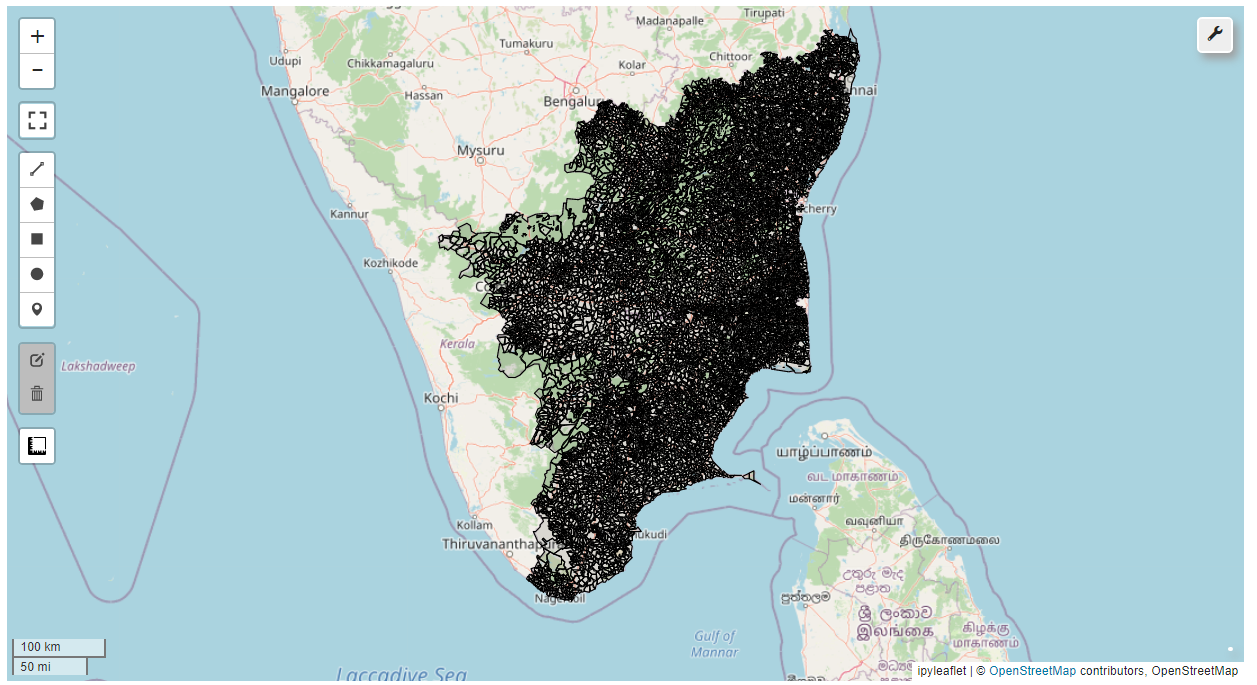

<AxesSubplot:>

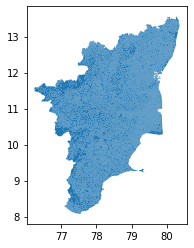

In [4]:
# Plot
in_shp = 'Data/india-village-census-2001-TN.shp'

p = gpd.read_file(in_shp)
p.plot()

#### Transform shapefile to get desired columns

In [20]:
p.head()

SID DID   TID VILL_CODE          C_CODE01          NAME     UID  \
0  33  01  0002  00008800  3301000200008800     Karimanal  609637   
1  33  01  0001  00000300  3301000100000300    Arambakkam  609638   
2  33  01  0001  00000100  3301000100000100    Egumadurai  609639   
3  33  01  0001  00000200  3301000100000200   Naidukuppam  609640   
4  33  01  0001  00000500  3301000100000500  Kannambakkam  609641   

     CENSUS_COD  STATE  DISTRICT  ...  TANK_IRR  RIVER_IRR  LAKE_IRR  W_FALL  \
0  3.301000e+15     33         1  ...      0.00       0.00       0.0    0.00   
1  3.301000e+15     33         1  ...      0.00       0.00       0.0  117.52   
2  3.301000e+15     33         1  ...      0.05      30.84       0.0    0.00   
3  3.301000e+15     33         1  ...      0.05      18.88       0.0    0.00   
4  3.301000e+15     33         1  ...     99.54       0.00       0.0   90.41   

  OTH_IRR TOT_IRR   UN_IRR  CULT_WASTE  AREA_NA_CU  \
0     0.0    0.00  1325.00      240.00     2329.76   
1     0.0  909.52  1309.17      113.34      114.49   
2     0.0    0.00    31.23       91.20       65.07   
3     0.0    0.01    18.96       94.60       28.65   
4     0.0    0.00   189.95        7.09       79.61   

                                            geometry  
0  POLYGON ((80.26843 13.56393, 80.26915 13.56311...  
1  POLYGON ((80.03970 13.53863, 80.03973 13.53863...  
2  POLYGON ((80.02533 13.54443, 80.02442 13.54222...  
3  POLYGON ((80.02533 13.54443, 80.02968 13.53999...  
4  POLYGON ((80.02955 13.51974, 80.02998 13.51947...  

[5 rows x 214 columns]

In [15]:
p.iloc[:, :100].columns

Index(['SID', 'DID', 'TID', 'VILL_CODE', 'C_CODE01', 'NAME', 'UID',
       'CENSUS_COD', 'STATE', 'DISTRICT', 'SUB_DIST', 'TOWN_VILL', 'WARD',
       'EB', 'LEVEL', 'NAME_1', 'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F',
       'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST',
       'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL', 'TOT_WORK_P',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F',
       'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F',
       'MARG_CL_P', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_P', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_P',
       'MARG_OT_M', 'MARG_OT_F', 'NON_WORK_P', 'NON_WORK_M', 'NON_WORK_F',
       'ST_CODE', 'DIST_CODE', 'THSIL_CODE', 'BLOCK_CODE', 'V_CT_CODE',
       'VILL_NAME', 'AREA', 'T_HH', 'T_P'

In [16]:
df_tn = p[["VILL_CODE", "NAME", "STATE", "DISTRICT", "SUB_DIST", "TOWN_VILL", "LEVEL","NAME_1", "No_HH", "TOT_P", "TOT_M", "TOT_F", "geometry"]]
df_tn.head()

VILL_CODE          NAME  STATE  DISTRICT  SUB_DIST  TOWN_VILL    LEVEL  \
0  00008800     Karimanal     33         1         2       8800     None   
1  00000300    Arambakkam     33         1         1        300  VILLAGE   
2  00000100    Egumadurai     33         1         1        100  VILLAGE   
3  00000200   Naidukuppam     33         1         1        200  VILLAGE   
4  00000500  Kannambakkam     33         1         1        500  VILLAGE   

            NAME_1  No_HH  TOT_P  TOT_M  TOT_F  \
0  KARIMANAL  (UI)      0      0      0      0   
1       Arambakkam   1810   8475   4183   4292   
2       Egumadurai    275   1087    544    543   
3      Naidukuppam     67    320    159    161   
4     Kannambakkam    264   1018    509    509   

                                            geometry  
0  POLYGON ((80.26843 13.56393, 80.26915 13.56311...  
1  POLYGON ((80.03970 13.53863, 80.03973 13.53863...  
2  POLYGON ((80.02533 13.54443, 80.02442 13.54222...  
3  POLYGON ((80.02533 13.54443, 80.02968 13.53999...  
4  POLYGON ((80.02955 13.51974, 80.02998 13.51947...

#### Convert to shapefile after transform 

In [ ]:
df_tn.to_file('india-village-census-2001-TN-1.shp') 

#### Add transformed shapefile to the map

In [11]:
q = leafmap.Map(center=[0, 0], zoom=2)
in_shp = 'Data/india-village-census-2001-TN-1.shp'
q.add_shp(in_shp, layer_name="Villages")

In [81]:
#q

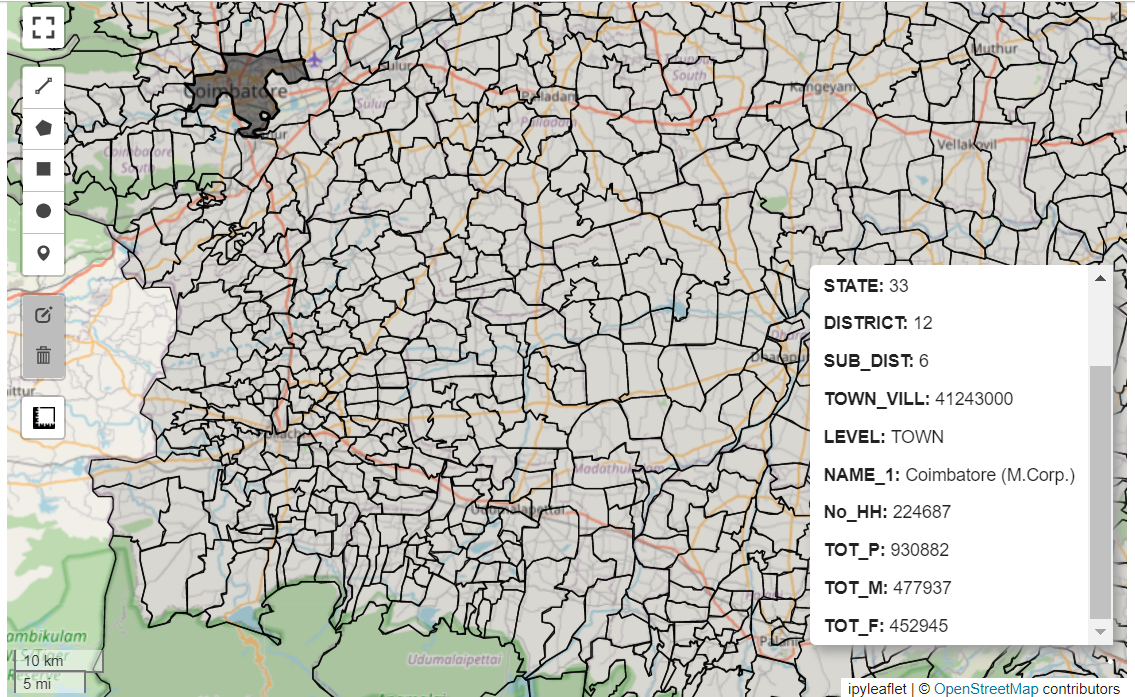

#### Load CSV file containing xy coordinates

In [2]:
in_csv = "CoimatoreVillagesWithLatLong.csv"
df = pd.read_csv(in_csv)
df

Town-Village    Level              Name  TOT_P  TOT_M  TOT_F    District  \
0          644340  VILLAGE  Chinnakallipatti   3858   1958   1900  Coimbatore   
1          644341  VILLAGE        Muduthurai   4394   2233   2161  Coimbatore   
2          644342  VILLAGE         Irumborai   8001   3974   4027  Coimbatore   
3          644343  VILLAGE     Illuppanatham   9255   4569   4686  Coimbatore   
4          644344  VILLAGE      Bellapalayam   9131   4606   4525  Coimbatore   
..            ...      ...               ...    ...    ...    ...         ...   
232        644586  VILLAGE      Kambalapatti   5380   2705   2675  Coimbatore   
233        644587  VILLAGE  Arthanaripalayam   3233   1633   1600  Coimbatore   
234        644588  VILLAGE        Jallipatti   2511   1216   1295  Coimbatore   
235        644589  VILLAGE          Thorayur    510    255    255  Coimbatore   
236        644590  VILLAGE     Angalakurichi   8816   4342   4474  Coimbatore   

                         Address       long        lat  
0    Chinnakallipatti,Coimbatore  77.108701  11.385853  
1          Muduthurai,Coimbatore  77.131014  11.350817  
2           Irumborai,Coimbatore  77.064411  11.371630  
3       Illuppanatham,Coimbatore  77.020339  11.331213  
4        Bellapalayam,Coimbatore  77.007305  11.319059  
..                           ...        ...        ...  
232      Kambalapatti,Coimbatore  77.037016  10.552347  
233  Arthanaripalayam,Coimbatore  77.062161  10.536575  
234        Jallipatti,Coimbatore  77.027660  10.525110  
235          Thorayur,Coimbatore  77.013264  10.543788  
236     Angalakurichi,Coimbatore  76.994547  10.533374  

[237 rows x 10 columns]

In [3]:
df.columns

Index(['Town-Village', 'Level', 'Name', 'TOT_P', 'TOT_M', 'TOT_F', 'District',
       'Address', 'long', 'lat'],
      dtype='object')

In [4]:
# Select desired columns 
df = df[['Name', 'District', 'lat', 'long', 'TOT_P','TOT_M','TOT_F']]

In [ ]:
in_csv = "CoimatoreVillagesWithLatLong.csv"
df = pd.read_csv(in_csv)
df = df[['Name', 'District', 'lat', 'long', 'TOT_P','TOT_M','TOT_F']]
c = leafmap.Map()
c.add_points_from_xy(df, x="long", y="lat")

In [ ]:
#c

#### Plot shapefile & csvfile as layers

In [5]:
q = leafmap.Map(center=[0, 0], zoom=2)

in_shp = 'Data/india-village-census-2001-TN-1.shp'
q.add_shp(in_shp, layer_name="Villages boundaries")

df = pd.read_csv(in_csv)
df = df[['Name', 'District', 'lat', 'long', 'TOT_P','TOT_M','TOT_F']]
q.add_points_from_xy(df, x="long", y="lat",layer_name="Villages")

In [ ]:
#q

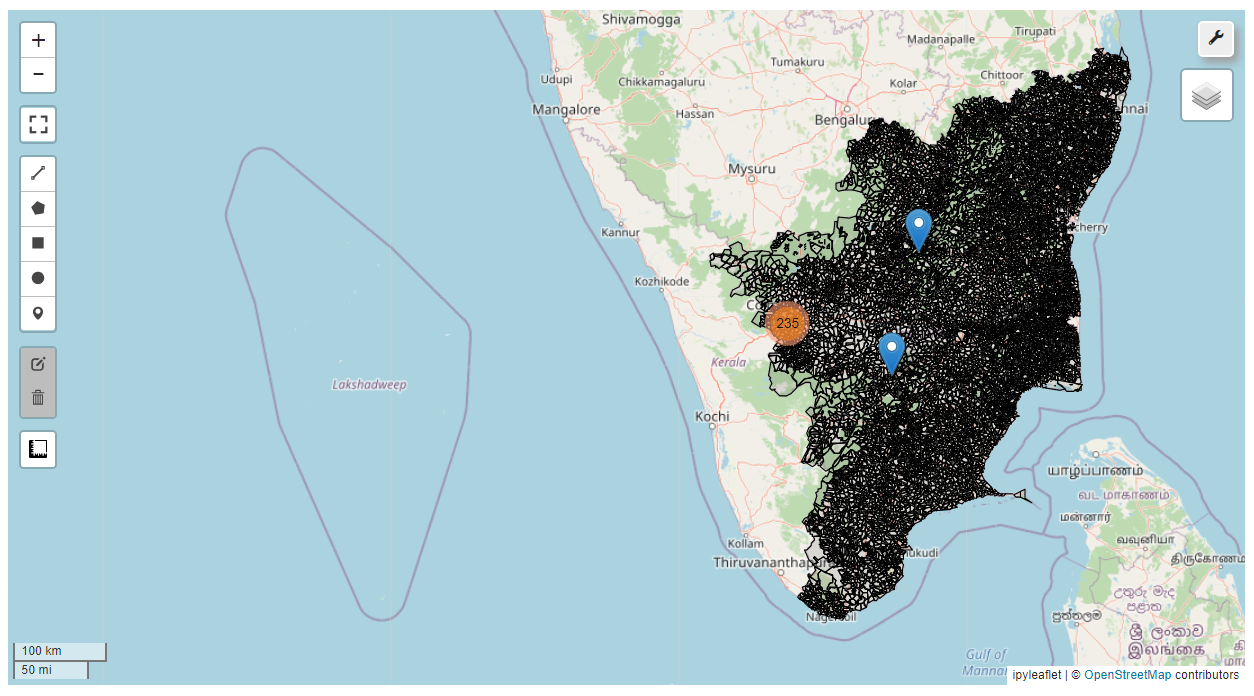

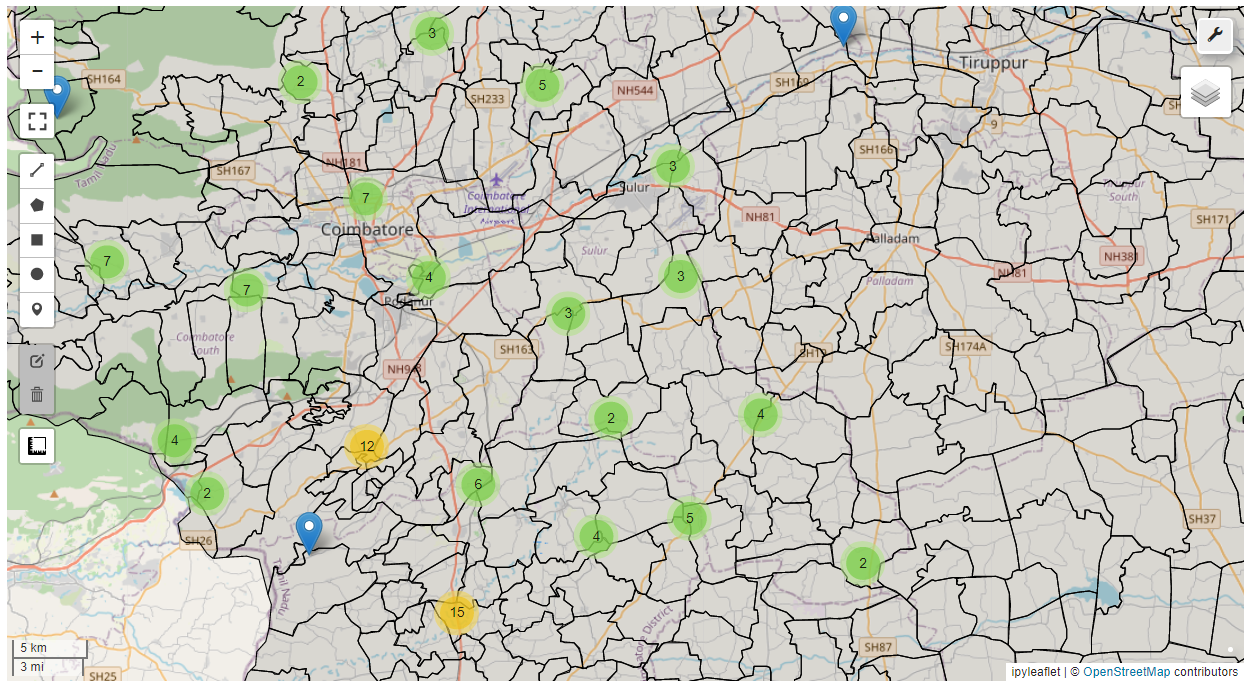